# Stock Market Prediction using-

# Importing Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 11, 10)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-03,111.489998,108.730003,109.660004,110.440002,107624400.0,110.249794
2020-11-04,115.589996,112.349998,114.139999,114.949997,138235500.0,114.752022
2020-11-05,119.620003,116.870003,117.949997,119.029999,126387100.0,118.824997
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.690002
2020-11-09,121.989998,116.050003,120.500000,116.320000,154050500.0,116.320000


In [2]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
Name: Adj Close, dtype: float64

In [3]:
train = df[:783]
valid = df[783:]

In [4]:
training = train['Close']
validation = valid['Close']

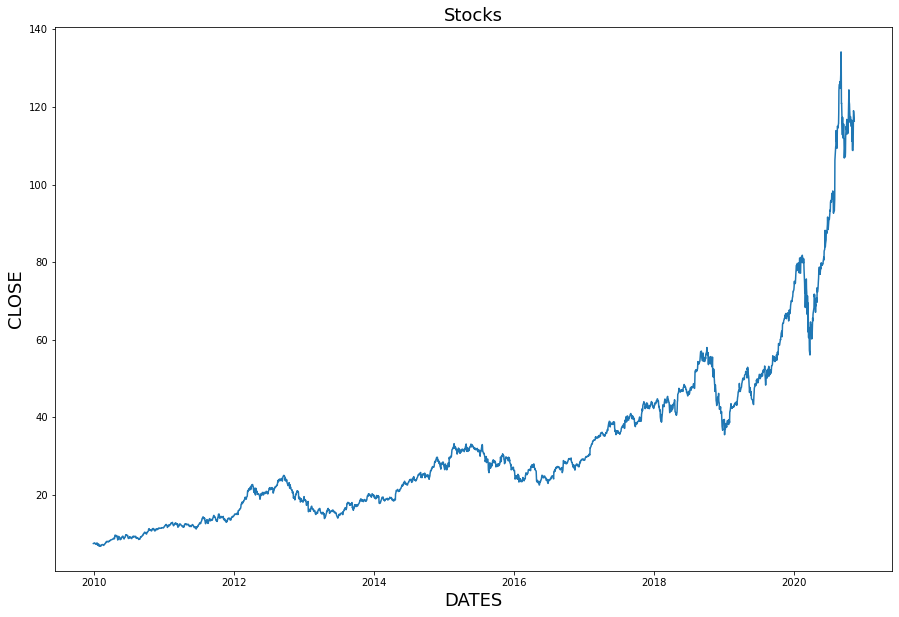

In [5]:
plt.figure(figsize=(15,10))
plt.title('Stocks', fontsize = 18)
plt.xlabel('DATES', fontsize= 18)
plt.ylabel('CLOSE', fontsize = 18)
plt.plot(df['Close'])
plt.show()

Text(0.5, 0, 'DATE')

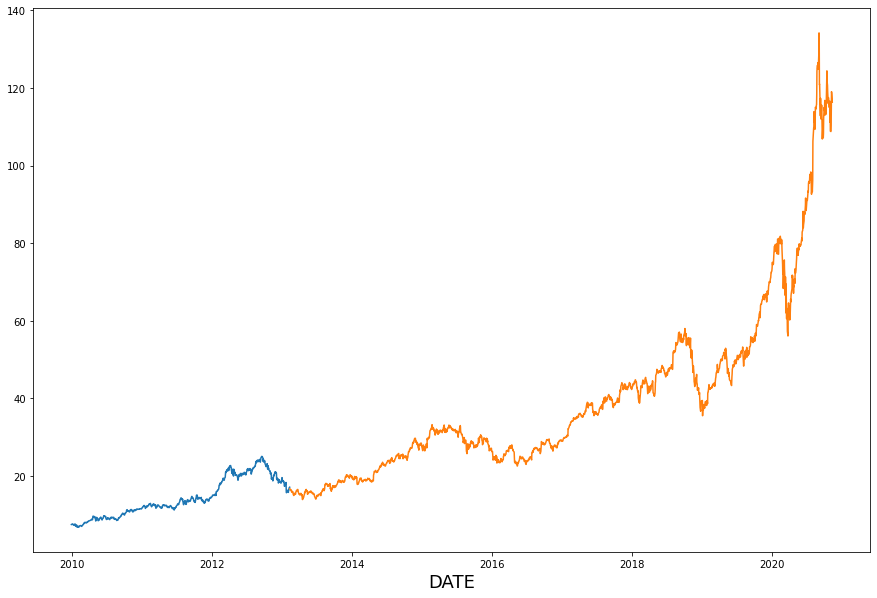

In [6]:
plt.figure(figsize=(15,10))

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.xlabel('DATE', fontsize= 18)

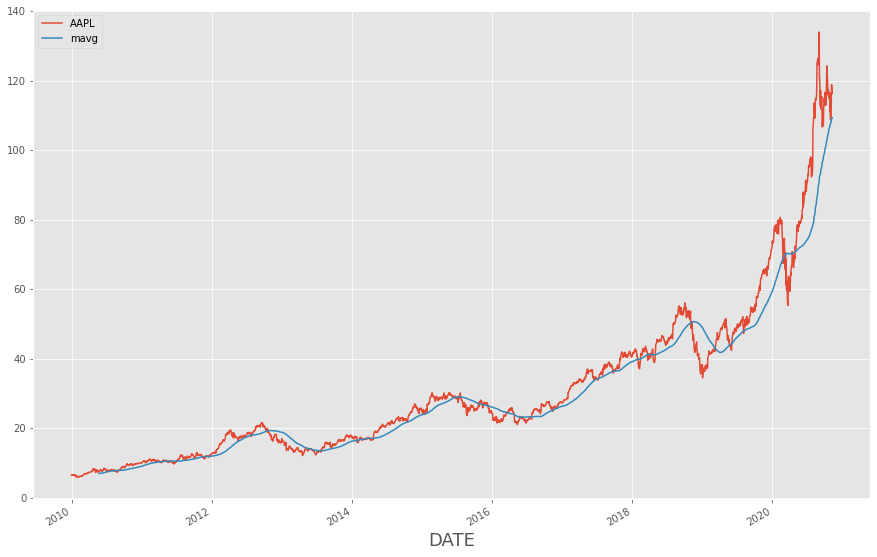

In [7]:
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.xlabel('DATE', fontsize= 18)
plt.legend()
plt.show()

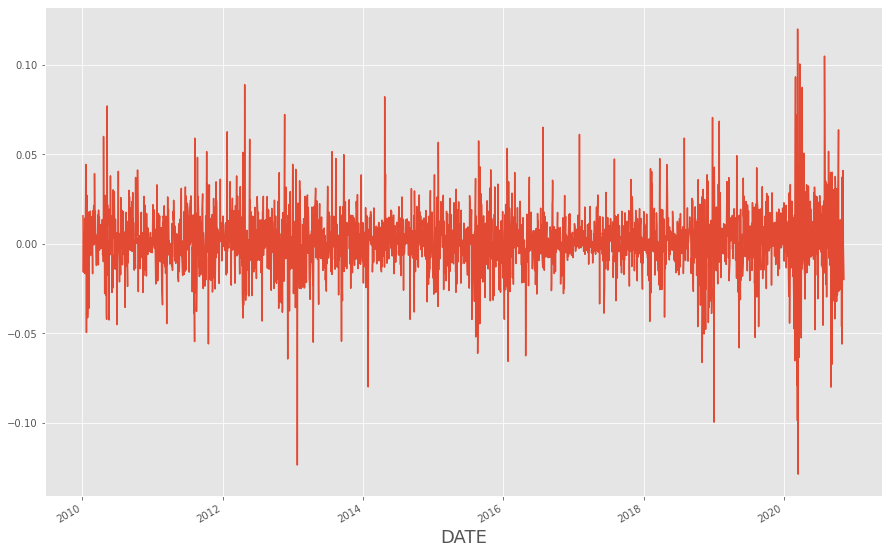

In [8]:
rets = close_px / close_px.shift(1) - 1
mpl.rc('figure', figsize=(15, 10))
mpl.__version__
rets.plot(label='return')
plt.xlabel('DATE', fontsize= 18)
plt.show()

In [9]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.439648,10.493408,308.832428,91.085335,23.801456
2010-01-04,6.539882,10.715343,312.204773,92.163887,24.168472
2010-01-05,6.551187,10.770829,310.829926,91.050545,24.176279
2010-01-06,6.446983,10.715343,302.994293,90.459076,24.027906
2010-01-07,6.435065,11.270185,295.940735,90.145927,23.778025


In [10]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014106,0.003578,-0.005741,-0.002145,0.009312


([<matplotlib.axis.YTick at 0x1815fb97ac0>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'GE'),
  Text(0, 0, 'GOOG'),
  Text(0, 0, 'IBM'),
  Text(0, 0, 'MSFT')])

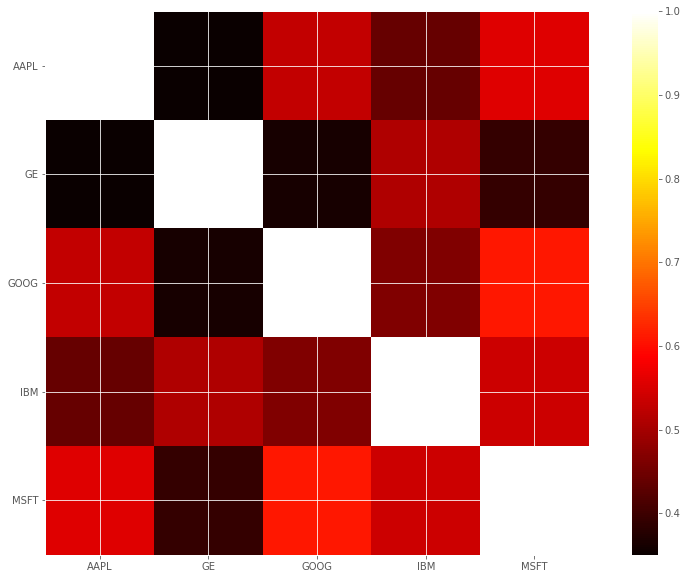

In [11]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

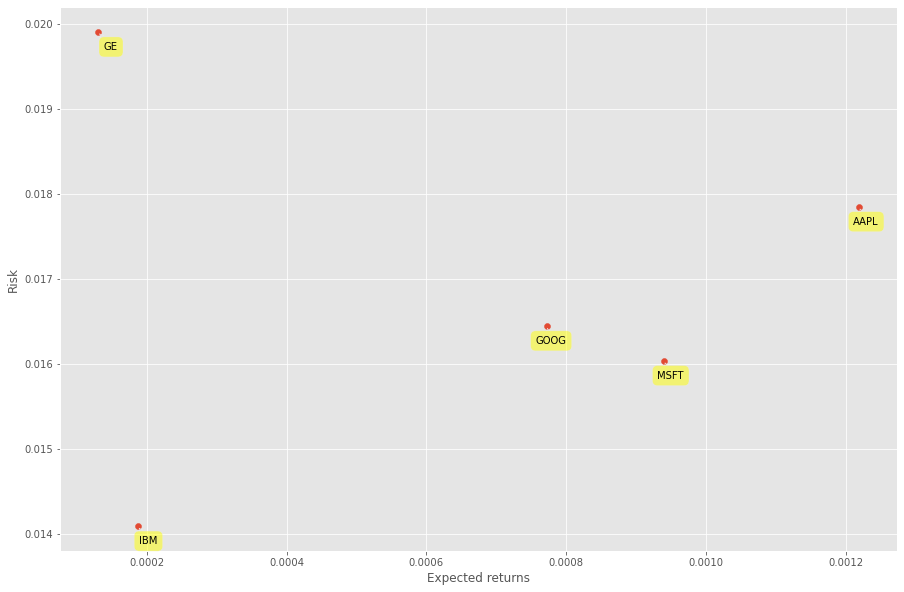

In [12]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# India-News-Headlines file imported and doing Numerical Analysis-

In [13]:
df_1 = pd.read_csv('india-news-headlines.csv')
df_1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [15]:
df_1['publish_date']=  pd.to_datetime(pd.Series(df_1['publish_date']), format = '%Y%m%d')
df_1['publish_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

0          2001-01-01
1          2001-01-02
2          2001-01-02
3          2001-01-02
4          2001-01-02
              ...    
3297167    2020-06-30
3297168    2020-06-30
3297169    2020-06-30
3297170    2020-06-30
3297171    2020-06-30
Name: publish_date, Length: 3297172, dtype: object

In [16]:
df_1.head(10)

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
5,2001-01-02,unknown,Extra buses to clear tourist traffic
6,2001-01-02,unknown,Dilute the power of transfers; says Riberio
7,2001-01-02,unknown,Focus shifts to teaching of Hindi
8,2001-01-02,unknown,IT will become compulsory in schools
9,2001-01-02,unknown,Move to stop freedom fighters' pension flayed


In [17]:
df_1.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

# Data Exploration-

In [18]:
df_1.describe()

,publish_date,headline_category,headline_text
count,3297172,3297172,3297172
unique,7080,1016,3082589
top,2018-12-31 00:00:00,india,Sunny Leone HOT photos
freq,766,285619,98
first,2001-01-01 00:00:00,NaN,NaN
last,2020-06-30 00:00:00,NaN,NaN


In [19]:
print('MAXIMUM FROM DATASET----> \n', df_1.max())
print('MINIMUM FROM DATASET---->\n', df_1.min())

MAXIMUM FROM DATASET----> 
 publish_date                                       2020-06-30 00:00:00
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object
MINIMUM FROM DATASET---->
 publish_date                     2001-01-01 00:00:00
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object


In [20]:
df_1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [21]:
df_1['headline_text'].value_counts()

Sunny Leone HOT photos                                    98
Watch top news in one-minute                              90
Official Site                                             89
Football: Italian Serie A table                           88
Football: Spanish La Liga table                           86
                                                          ..
Court tells 8 Besu boys to pay Rs 1 lakh each              1
ASI derails AMC's joy trains at Kankaria                   1
Bangladesh to probe India's charges on ISI; al-Qaeda       1
Civic sweeper gets an MPhil                                1
Goa medical college renotifies rates for private wards     1
Name: headline_text, Length: 3082589, dtype: int64

In [22]:
df_1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
actresses                       7
delhi-ncr                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

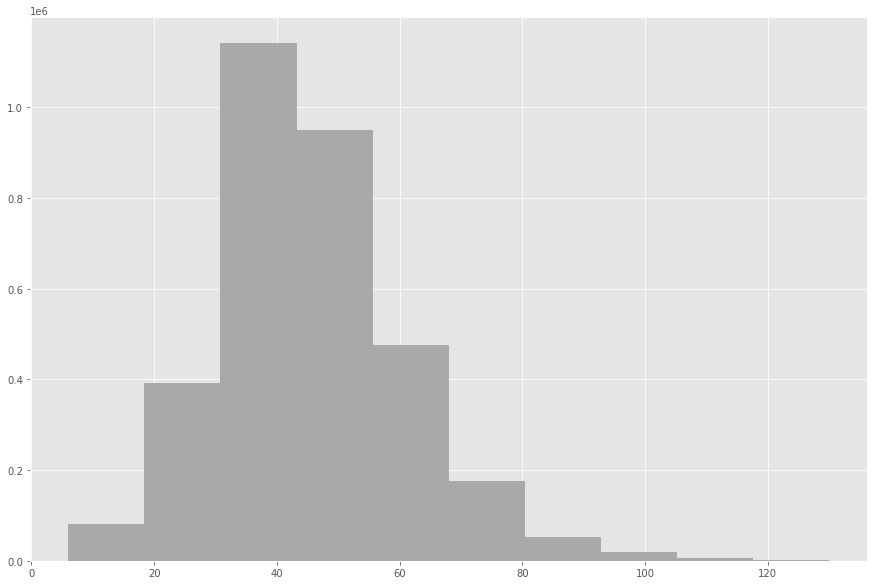

In [23]:
df_1['headline_text'].str.len().hist(color='darkgrey')
plt.show()

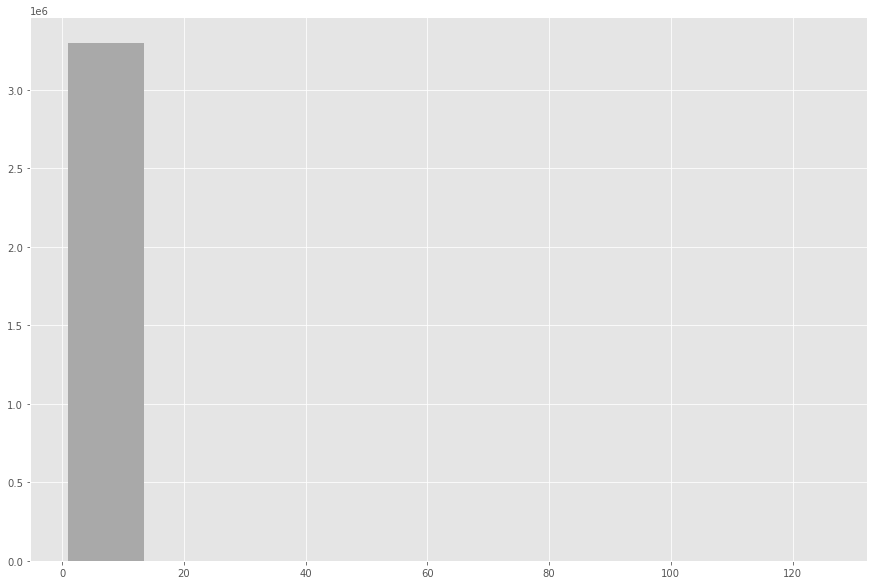

In [24]:
df_1['headline_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(color='darkgrey')
plt.show()

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
corpus = []
new = df_1['headline_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [27]:
from collections import defaultdict

dict = defaultdict(int)
for word in corpus:
    if word in stop:
        dict[word]+=1

In [28]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

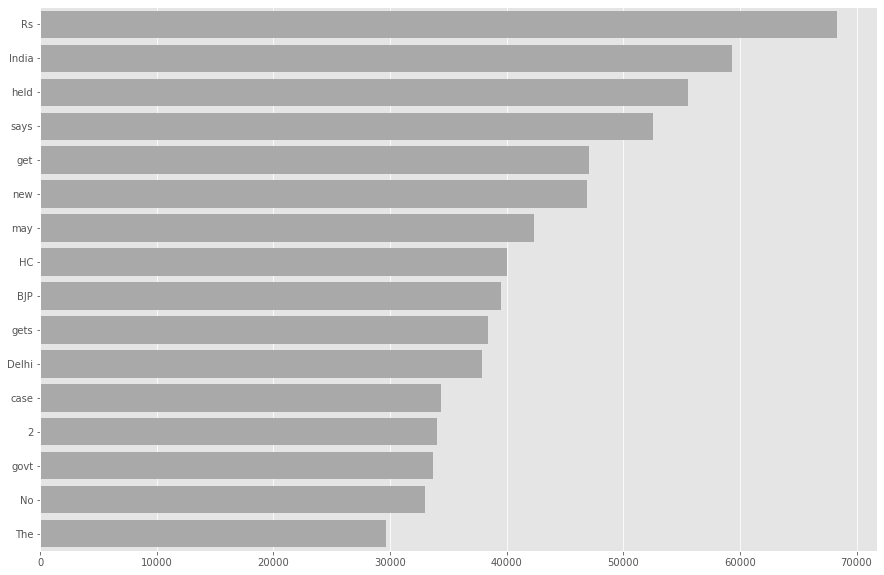

In [29]:
sns.barplot(x = y , y = x)
plt.show()

## Textblob-

In [30]:
from textblob import TextBlob, Word, Blobber

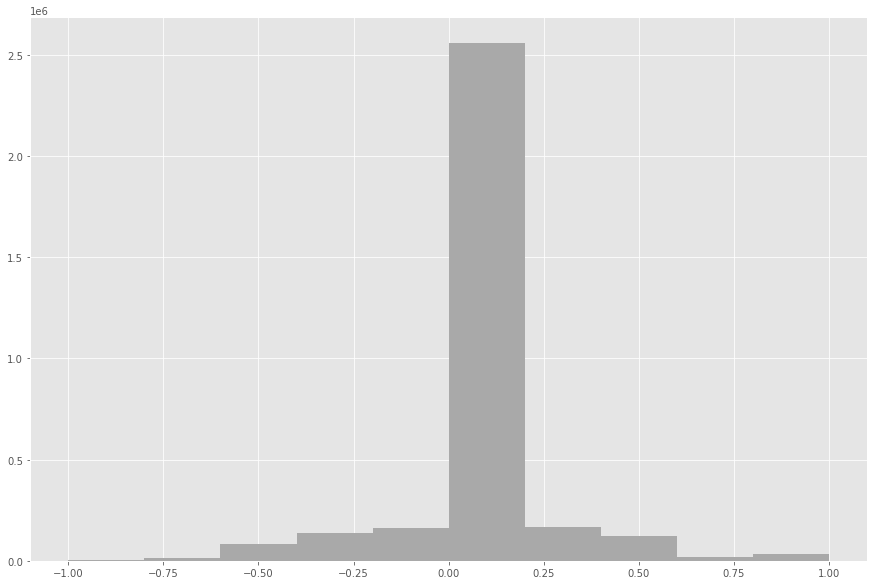

In [31]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df_1['polarity_score'] = df_1['headline_text'].\
   apply(lambda x : polarity(x))
df_1['polarity_score'].hist(color='darkgrey')
plt.show()

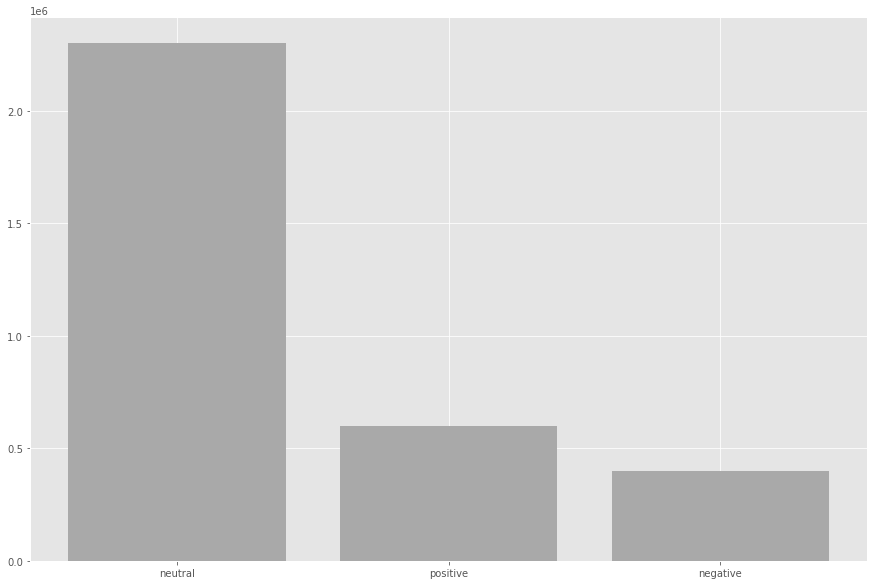

In [32]:
def sentiment(x):
    if x < 0:
        return 'negative'
    elif x == 0:
        return 'neutral'
    else:
        return 'positive'
    
df_1['polarity'] = df_1['polarity_score'].\
   map(lambda x : sentiment(x))
plt.bar(df_1.polarity.value_counts().index,
        df_1.polarity.value_counts(),color='darkgrey')
plt.show()

In [33]:
df_1[df_1['polarity'] == 'positive']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [34]:
df_1[df_1['polarity'] == 'negative']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object

In [35]:
wordcloud=df_1['headline_category']

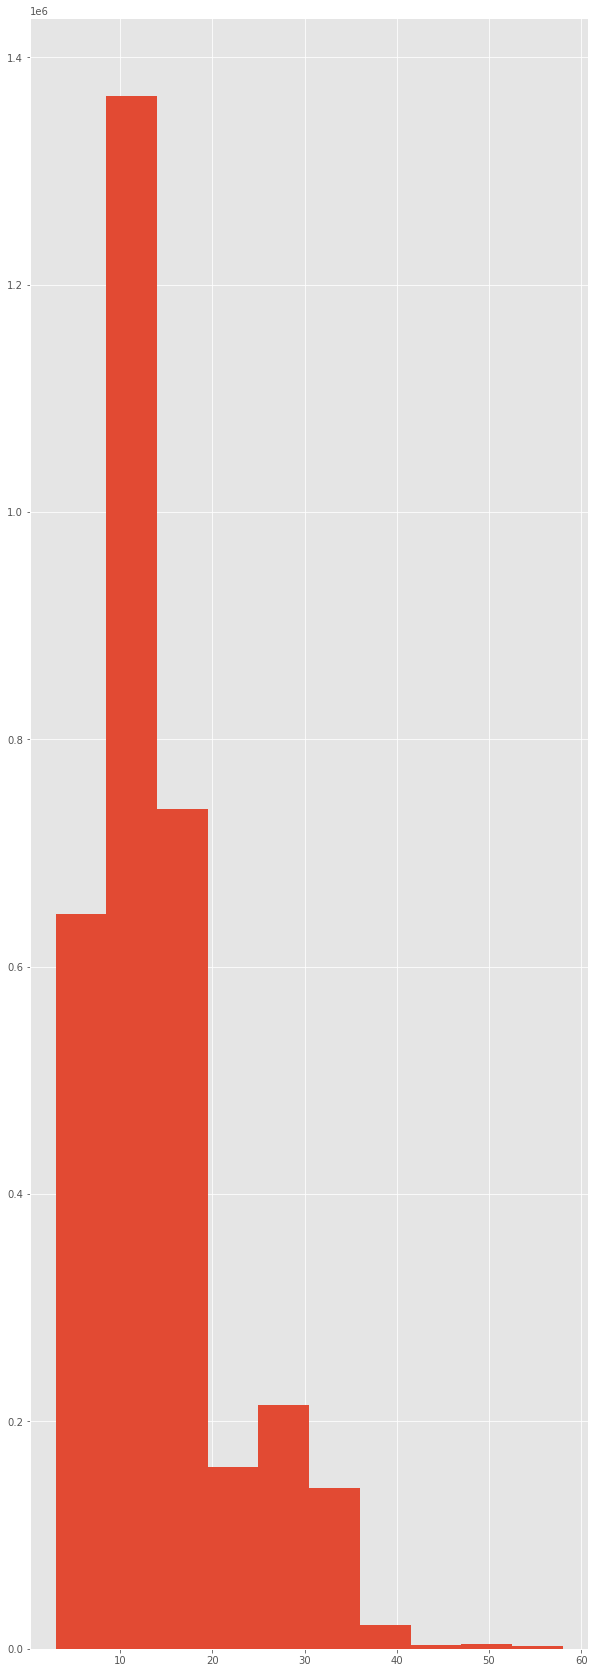

<Figure size 216x216 with 0 Axes>

In [38]:
wordcloud.str.len().hist()
plt.figure(figsize=(3,3))
plt.show()

## Thank You 